In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving Cleaned-COVID-19 Survey Student Responses.csv to Cleaned-COVID-19 Survey Student Responses (5).csv


,ID,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [51]:
df.shape

(1115, 17)

In [53]:
df = df.rename(columns={
    "ID": "id",
    "Age of Subject": "age",
    "Time spent on Online Class": "online_class_time",
    "Rating of Online Class experience": "class_rating",
    "Medium for online class": "class_medium",
    "Time spent on self study": "self_study_time",
    "Time spent on fitness": "fitness_time",
    "Time spent on sleep": "sleep_time",
    "Time spent on social media": "social_media_time",
    "Time spent on TV": "tv_time",
    "Number of meals per day": "meals_per_day",
    "Change in your weight": "weight_change",
    "Health issue during lockdown": "health_issues",
    "Stress busters": "stress_busters",
    "Time utilized": "time_utilized",
    "Do you find yourself more connected with your family, close friends , relatives  ?": "connection_with_family",
    "What you miss the most": "miss_most"
})
df.head()

,id,age,online_class_time,class_rating,class_medium,self_study_time,fitness_time,sleep_time,social_media_time,tv_time,meals_per_day,weight_change,health_issues,stress_busters,time_utilized,connection_with_family,miss_most
0,R1,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [54]:
cols_to_drop = [
    'id',
    'fitness_time',
    'tv_time',
    'meals_per_day',
    'weight_change',
    'health_issues',
    'stress_busters',
    'connection_with_family',
    'miss_most'
]

# Drop the columns
df_clean = df.drop(columns=cols_to_drop)
df_clean.head()

,age,online_class_time,class_rating,class_medium,self_study_time,sleep_time,social_media_time,time_utilized
0,21,2.0,Good,Laptop/Desktop,4.0,7.0,3.0,YES
1,21,0.0,Excellent,Smartphone,0.0,10.0,3.0,YES
2,20,7.0,Very poor,Laptop/Desktop,3.0,6.0,2.0,NO
3,20,3.0,Very poor,Smartphone,2.0,6.0,5.0,NO
4,21,3.0,Good,Laptop/Desktop,3.0,8.0,3.0,NO


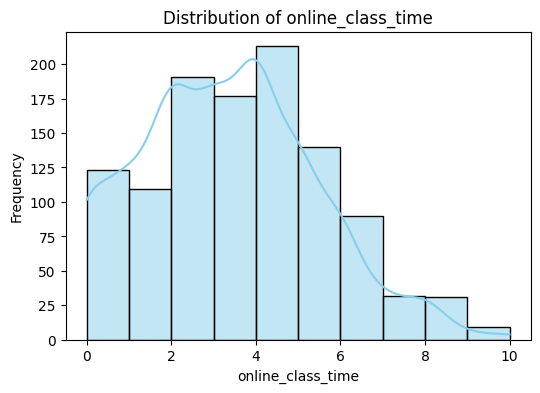

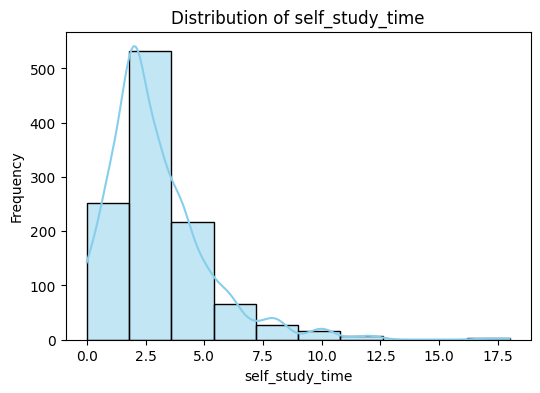

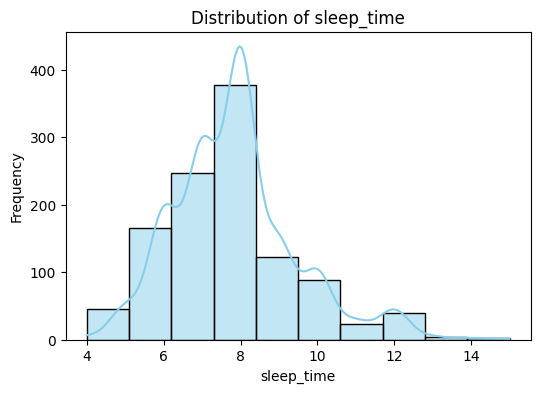

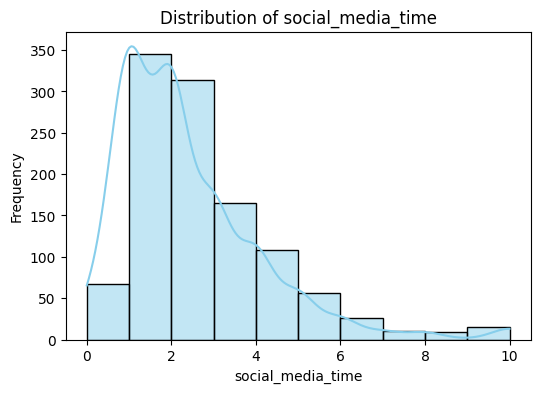

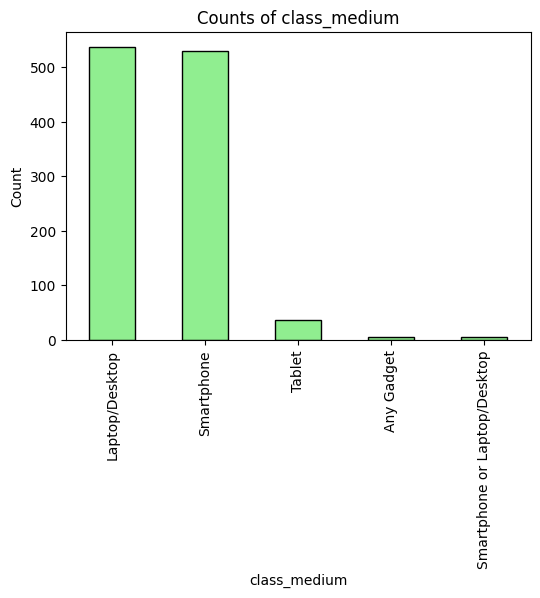

In [55]:
numeric_cols = ["online_class_time", "self_study_time", "sleep_time", "social_media_time"]
categorical_cols = ["class_medium"]
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), bins=10, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind="bar", color="lightgreen", edgecolor="black")
    plt.title(f"Counts of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


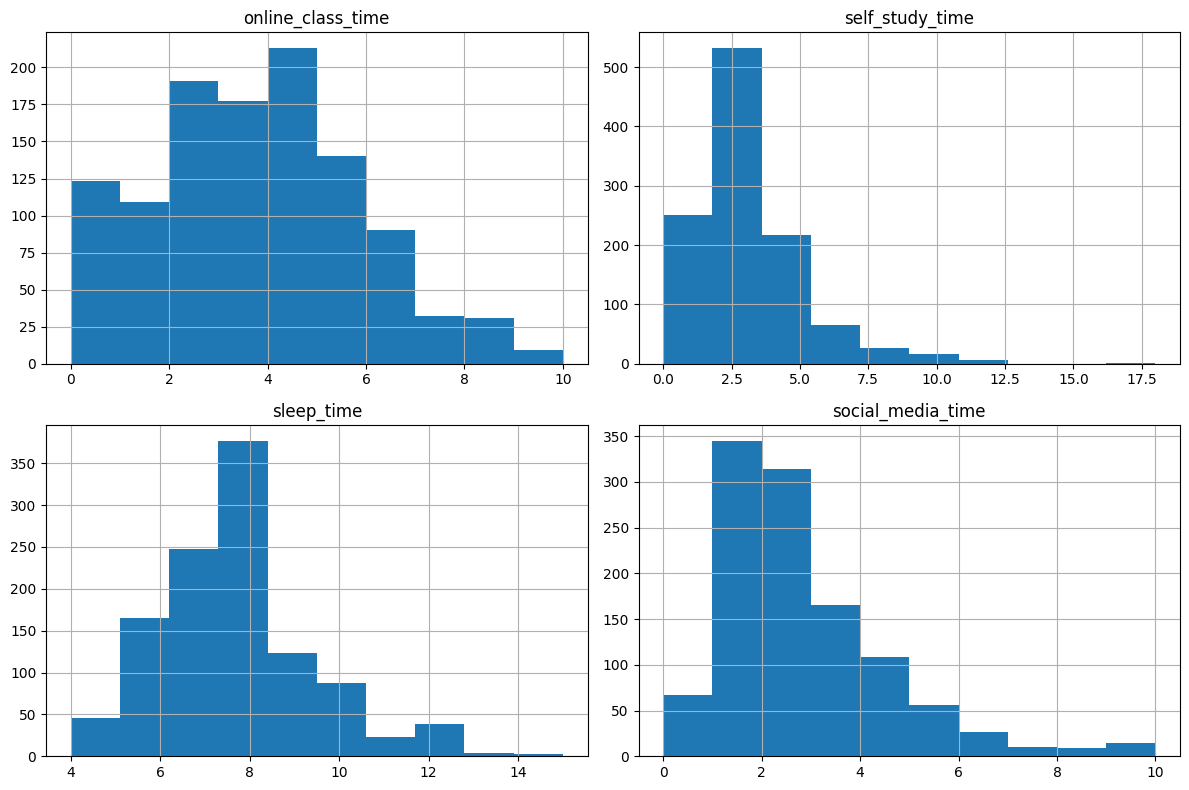

In [56]:
import matplotlib.pyplot as plt

num_cols = ["online_class_time", "self_study_time", "sleep_time", "social_media_time", "time_utilized"]

df[num_cols].hist(figsize=(12,8), bins=10)
plt.tight_layout()
plt.show()


In [57]:
df_clean.to_csv("Exploration-Cleaned-COVID-19 Survey Student Responses.csv", index=False)
from google.colab import files
files.download("Exploration-Cleaned-COVID-19 Survey Student Responses.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>